In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree

In [2]:
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Note that the survived column and alive column is consider as closely related variable
# For example, if the passanger is survived, most probably they are still alive (1), while not survived, the alive column definitely is no.
# Therefore, the column 'alive' will be removed.
# Same to column 'sex' and 'who' and 'adult_male'

data = dataset.drop(columns=['alive','who','adult_male'])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,True


In [4]:
# categorical encode
categorical_col = ['sex','embarked','class','alone','embark_town','deck']
data[categorical_col] = data[categorical_col].astype(str)

le = preprocessing.LabelEncoder()
for col in categorical_col:
  data[col] = le.fit_transform(data[col])

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,7,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,7,2,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,2,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,7,2,1
887,1,1,0,19.0,0,0,30.0000,2,0,1,2,1
888,0,3,0,NaN,1,2,23.4500,2,2,7,2,0
889,1,1,1,26.0,0,0,30.0000,0,0,2,0,1


In [5]:
# check if any NaN
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
deck             0
embark_town      0
alone            0
dtype: int64

In [6]:
# Impute the age with mean value
data['age']=data['age'].replace({np.nan:data['age'].mean()})
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
deck           0
embark_town    0
alone          0
dtype: int64

In [7]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (713, 12)
Shape of testing data : (178, 12)


In [8]:
# Since the survived column is the variable that we want to predict
# Thus, we make it as train label and test label
train_x = train_data.drop(columns=['survived'],axis=1)
train_y = train_data['survived']

test_x = test_data.drop(columns=['survived'],axis=1)
test_y = test_data['survived']

In [9]:
gini_random_forest_model = RandomForestClassifier(criterion = 'gini', n_estimators=10)
gini_random_forest_model.fit(train_x, train_y)
gini_random_forest_model.score(train_x, train_y)

0.9831697054698457

In [10]:
# Predict if the passanger is survived
prediction = gini_random_forest_model.predict(test_x)
gini_test_accuracy = accuracy_score(test_y,prediction)
print('Gini Random Forest test accuracy: ', gini_test_accuracy)

Gini Random Forest test accuracy:  0.7752808988764045


The parameter n_estimators is control the number of trees in the forest, and it is directly affect the model performance. We can try some simple experiment here to observe the relationship between number of trees and test prediction accuracy.

In [11]:
train_acc = []

for i in range(10,160,10):
  model = RandomForestClassifier(criterion = 'gini', n_estimators=i)
  model.fit(train_x, train_y)
  acc = model.score(train_x, train_y)
  train_acc.append(acc)
  print('Training accuracy for {} trees is {}'.format(i, acc))

Training accuracy for 10 trees is 0.9733520336605891
Training accuracy for 20 trees is 0.9845722300140253
Training accuracy for 30 trees is 0.9887798036465638
Training accuracy for 40 trees is 0.9901823281907434
Training accuracy for 50 trees is 0.9915848527349228
Training accuracy for 60 trees is 0.9915848527349228
Training accuracy for 70 trees is 0.9915848527349228
Training accuracy for 80 trees is 0.9901823281907434
Training accuracy for 90 trees is 0.9915848527349228
Training accuracy for 100 trees is 0.9915848527349228
Training accuracy for 110 trees is 0.9915848527349228
Training accuracy for 120 trees is 0.9915848527349228
Training accuracy for 130 trees is 0.9915848527349228
Training accuracy for 140 trees is 0.9915848527349228
Training accuracy for 150 trees is 0.9915848527349228


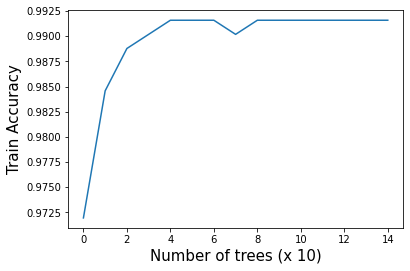

In [28]:
plt.plot(train_acc)
plt.xlabel('Number of trees (x 10)', fontsize=15)
plt.ylabel('Train Accuracy', fontsize=15)
plt.show()

Seem like the training accuracy is saturate since 50 trees. However, here we suspect the best training accuracy score does not necessary provide best test accuracy score. Therefore, we try the experiment by generate the test accuracy.

In [34]:
train_acc = []
test_acc = []
axes = []

for i in range(10,160,10):
  axes.append(i)
  model = RandomForestClassifier(criterion = 'gini', n_estimators=i)
  model.fit(train_x, train_y)
  train_score = model.score(train_x, train_y)
  train_acc.append(train_score)

  pred = model.predict(test_x)
  test_score = accuracy_score(test_y,pred)
  test_acc.append(test_score)

  print('Test accuracy for {} trees is {}'.format(i, test_score))

Test accuracy for 10 trees is 0.7808988764044944
Test accuracy for 20 trees is 0.7865168539325843
Test accuracy for 30 trees is 0.7640449438202247
Test accuracy for 40 trees is 0.7865168539325843
Test accuracy for 50 trees is 0.7865168539325843
Test accuracy for 60 trees is 0.797752808988764
Test accuracy for 70 trees is 0.7696629213483146
Test accuracy for 80 trees is 0.7752808988764045
Test accuracy for 90 trees is 0.7696629213483146
Test accuracy for 100 trees is 0.797752808988764
Test accuracy for 110 trees is 0.7752808988764045
Test accuracy for 120 trees is 0.7752808988764045
Test accuracy for 130 trees is 0.7752808988764045
Test accuracy for 140 trees is 0.7752808988764045
Test accuracy for 150 trees is 0.7640449438202247


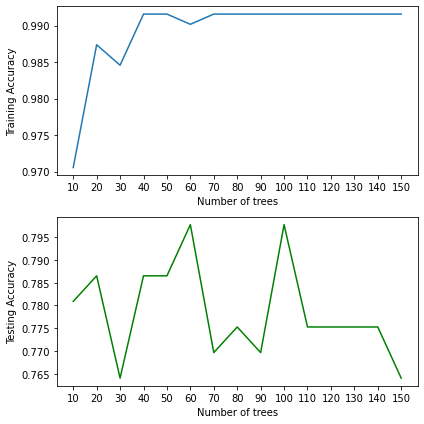

In [59]:
original_axis = list(range(0,len(test_acc)))

fig, axs = plt.subplots(2, 1)

fig.set_figheight(6)
fig.set_figwidth(6)

axs[0].plot(train_acc)
axs[0].set(xlabel='Number of trees', ylabel='Training Accuracy')

axs[1].plot(test_acc, color='g')
axs[1].set(xlabel='Number of trees', ylabel='Testing Accuracy')

# Set the ticks and ticklabels for all axes
plt.setp(axs, xticks=original_axis, xticklabels=axes)

plt.tight_layout()
plt.show()

Based on above results, we can justify that the 100 is optimum value for number of trees since it has highest accuracy in test.

In [72]:
optimum_gini_RF_model = RandomForestClassifier(criterion = 'gini', n_estimators=100)
optimum_gini_RF_model.fit(train_x, train_y)
print('Gini Random Forest training accuracy: ', optimum_gini_RF_model.score(train_x, train_y))
opt_gini_prediction = optimum_gini_RF_model.predict(test_x)
opt_gini_test_accuracy = accuracy_score(test_y,opt_gini_prediction)
print('Gini Random Forest test accuracy: ', opt_gini_test_accuracy)

Gini Random Forest training accuracy:  0.9915848527349228
Gini Random Forest test accuracy:  0.7808988764044944


As decision tree parameter provide by Sklearn, we can try on 'entropy' for criterion.

In [73]:
optimum_entropy_RF_model = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
optimum_entropy_RF_model.fit(train_x, train_y)
print('Entropy Random Forest training accuracy: ', optimum_entropy_RF_model.score(train_x, train_y))

opt_entropy_prediction = optimum_entropy_RF_model.predict(test_x)
opt_entropy_test_accuracy = accuracy_score(test_y,opt_entropy_prediction)
print('Entropy Random Forest test accuracy: ', opt_entropy_test_accuracy)

Entropy Random Forest training accuracy:  0.9915848527349228
Entropy Random Forest test accuracy:  0.7696629213483146
